# Exploratory Data Analysis (EDA) of Telecom Data

## Objective

In this Jupyter notebook, we will perform Exploratory Data Analysis (EDA) on a dataset named "onlineexperience.xlxs." This synthetic dataset is valuable for understanding how users discover a website, which can be essential for marketing, SEO (search engine optimization), and user experience optimization. It can help in evaluating the effectiveness of different marketing and traffic generation strategies and in identifying areas for improvement. As a data analyst at the marketing agency, Creative Pulse that works with its telecom partners in selling their services, we will use various analysis and visualization techniques to gain actionable insights from the dataset. By the end of this, you will be able to: 

- Assess the importance of exploratory data analysis in analytics.
- Apply data visualization techniques to understand the customers with Matplotlib and Seaborn.
- Practice the principles of design in data visualization.
- Reshape the data to prepare it for plotting using Pandas.
- Assess key elements of data visualization that should be communicated. 

## Pre-requisites
- Python Environment: You should have a Python environment set up on your system. If you don't have Python installed, you can download it from the [official Python website](https://www.python.org/downloads/). We recommend downloading Python 3.8 or above.
- Jupyter Notebook: This code is intended to be run in a Jupyter Notebook environment. Make sure you have [Jupyter Notebook installed](https://jupyter.org/install).
- Library installation: Before we get started, you need to install the following Python libraries if you haven't already:
    - Pandas
    - Matplotlib
    - Seaborn

To install, run the following commands:
"**!pip3 install pandas matplotlib seaborn plotly**"

In [1128]:
## Install necessary libraries

!pip3 install pandas matplotlib seaborn plotly circlify


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


### Import necessary libraries

In [1129]:
## Import necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import circlify
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

### Business Problem

**Overview**

Creative Pulse is a marketing agency that has a strategic partnership with a telecommunications company – that sells phone, internet, and cable services from their website. There are two ways to purchase these services: 
- An online cart
- Call center sales agent

Creative Pulse runs both of these services for the company. The website optimization goal is to deliver the most appropriate purchase experience to each visitor based on what is known about them and their user behavior.

**Business Problem**

However, the telecommunications industry is negatively impacted by customers using alternative service providers for cable, home telephone, and internet. Creative Pulse is responsible for improving both online sales and call center sales. They are searching for ways to increase profits. Companies acquire new customers by offering exceptional experiences, so Creative Pulse is focused on optimizing the customer experience when placing orders. As a marketing analyst for Creative Pulse, our task is to find patterns in the data and make recommendations based on actionable insights.

### Loading the dataset

The values in this dataset range from February to June 2018. The contains 20,256 records and 21 variables:

- Session Id: A unique number that the website's server assigns to the visitor.
- Session Start Time: Date and time stamp of when the browsing started.
- Sessions: Number of sessions by a visitor. A session is created when the user visits the site and expires when the user has no browsing activities for up to 30 minutes.
- Total Order: Total number of orders by the visitor.
- Cart Order: Number of orders placed by the visitor through the online cart.
- Phone Order: Number of orders placed by the visitor through a sales agent on the phone.
- Connection: Internet connection of the visitor (Broadband, cable, satellite, etc)
- City: City from where the visitor visited the website.
- Distinct page: Number of distinct pages visited by the visitor.
- ISP Name: Name of the internet service provider (Verizon Business, Att Internet, etc)
- Landing Page Raw: Landing page of the visitor.
- Device Type: Device type used to browse the website (Mobile, Desktop, Tablet).
- Browser Name: Browser's name used to visit the website.
- Manufacturer: Manufacturer of the device used to visit the website.
- Country: Country from where the browsing occurred.
- Metro Name: Metro city area from where the browsing occurred.
- OS Name: Name of the operating system (Windows 10, OS X)
- Order Monthly Charge: Monthly charge paid by the user.
- State: State/ province of the visitor.
- Zip Code: Zip code of the visitor's address on file.
- Traffic Source: The source of traffic (paid search, organic, direct entry, etc).

### Load the Dataset

In [1130]:
# Load the dataset

dataset = pd.read_excel('Onlineexperience.xlsx')
dataset.head()

,Session Id,Session Start Time,Browser Name,Sessions,Total Orders,Cart Order,Phone Order,City,Connection Speed,Country,...,Distinct Page Views,ISP Name,Landing Page Raw,Manufacturer,Metro Name,OS Name,Order Monthly Charge,State,Zip Code,Traffic Source
0,03b1d69a-6463-40a3-b67b-a434d02d673b,2018-02-28 13:49:47,Chrome,1,1.0,NaN,1.0,Glendale,Broadband,US,...,3,Verizon Business,https://phonecompanyx.com/,Unknown,Phoenix (Prescott),Windows 10,59.99,AZ,85301,Natural Search
1,03b1d69a-6463-40a3-b67b-a434d02d673b,2018-02-28 13:49:47,Chrome,1,1.0,NaN,1.0,Glendale,Broadband,US,...,3,Verizon Business,https://phonecompanyx.com/,Unknown,Phoenix (Prescott),Windows 10,59.99,AZ,85301,Natural Search
2,067b30cf-b070-4e26-bf5e-9c8fc52ab3d5,2018-02-26 14:12:28,Safari,1,1.0,NaN,1.0,Riverside,Xdsl,US,...,2,Att Internet Services,https://phonecompanyx.com/,Apple,Los Angeles,OS X,79.99,CA,92507,Direct Entry
3,178df541-6cdd-4dc4-af9e-f85b8ae5b334,2018-02-18 18:47:47,Chrome,1,1.0,NaN,1.0,San Antonio,Cable,US,...,1,Time Warner Cable Internet Llc,https://phonecompanyx.com/,Unknown,San Antonio,Windows 7,24.99,TX,78203,Direct Entry
4,20b785f2-920a-4222-b517-407ece1a6439,2018-02-25 17:50:04,Firefox,1,1.0,NaN,1.0,Beverly Hills,Broadband,US,...,2,Mci Communications Services Inc. Dba Verizon B...,https://phonecompanyx.com/,Unknown,Los Angeles,Windows 7,24.99,CA,90212,Direct Entry


### Exploratory Data Analysis 

In [1131]:
dataset.shape

(20256, 21)

In [1132]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20256 entries, 0 to 20255
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Session Id            20256 non-null  object        
 1   Session Start Time    20256 non-null  datetime64[ns]
 2   Browser Name          20256 non-null  object        
 3   Sessions              20256 non-null  int64         
 4   Total Orders          663 non-null    float64       
 5   Cart Order            305 non-null    float64       
 6   Phone Order           358 non-null    float64       
 7   City                  20256 non-null  object        
 8   Connection Speed      20256 non-null  object        
 9   Country               20256 non-null  object        
 10  Device Type           20256 non-null  object        
 11  Distinct Page Views   20256 non-null  int64         
 12  ISP Name              20256 non-null  object        
 13  Landing Page Raw

In [1178]:
# Exploring categorical variables

browser_name = dataset['Browser Name'].value_counts()
device_type = dataset['Device Type'].value_counts()
os_name = dataset['OS Name'].value_counts()
manufacturer = dataset['Manufacturer'].value_counts()
traffic_source = dataset['Traffic Source'].value_counts()
state = dataset['State'].value_counts()

print(browser_name)

Browser Name
Chrome                      7662
Safari                      4777
Internet Explorer           2121
Chrome Mobile               1982
Firefox                     1607
Edge                        1507
Samsung Browser              398
Amazon Silk                   90
Unknown                       35
AOL Browser                   28
Opera                         27
Opera Mobile                   4
Comodo Dragon                  4
Internet Explorer Mobile       3
SeaMonkey                      3
Chromium                       3
Puffin                         2
Other                          1
Pale Moon                      1
MIUI Browser                   1
Name: count, dtype: int64


Here we  various see, web browsers and the number of times each browser was encountered or recorded in a dataset. The counts represent the frequency or popularity of each browser within the dataset:

- "Chrome" is the most popular browser in the dataset, appearing 7,662 times.
- "Safari" is the second most popular browser, appearing 4,777 times.
- "Internet Explorer" is the third most popular, appearing 2,121 times.
- The list continues down to less commonly used browsers with their respective counts. The last row, "MIUI Browser," appears only once in the dataset.

In [1134]:
print(device_type)

Device Type
Desktop    14271
Mobile      4827
Tablet      1158
Name: count, dtype: int64


In this case:

- "Desktop" appears 14,271 times.
- "Mobile" appears 4,827 times.
- "Tablet" appears 1,158 times.

In [1135]:
print(os_name)

OS Name
Windows 10          6668
Windows 7           4095
iOS                 3624
Android             2348
OS X                2235
Windows 8.1          675
Chrome OS            162
Linux                141
Windows XP            97
Windows Vista         95
Windows 8             44
Unknown               26
Linux - Ubuntu        25
Windows RT             9
Windows                5
Windows Phone          4
Linux - Fedora         2
PlayStation 4 OS       1
Name: count, dtype: int64


"OS Name" is a categorical variable representing the name of the operating system. The numbers (counts) represent how many times each operating system name appears in the dataset:

- "Windows 10" appears 6,668 times, making it the most common operating system in the dataset.
- "Windows 7" is the second most common, appearing 4,095 times.
- "iOS" appears 3,624 times, indicating a significant number of users on Apple devices.
- "Android" is the most common mobile OS, appearing 2,348 times.

In [1136]:
print(manufacturer)

Manufacturer
Unknown        10785
Apple           5665
Microsoft       1511
Samsung         1371
LG               362
Motorola         154
ZTE              113
Amazon            94
Google            40
HTC               32
Alcatel           28
Huawei            15
RCA               13
Quanta            10
LTC                7
Kyocera            5
RCA Tablets        5
Coolpad            4
Asus               3
OnePlus            3
BlackBerry         3
HP                 3
TCL                2
NuVision           2
Lenovo             2
Nextbook           2
TracFone           2
Xiaomi             2
Kyoceera           2
T-Mobile           2
LeEco              2
Yulong             2
Sony               2
Blu                1
UMX                1
Unimax             1
Sheffield          1
Letv               1
Allwinner          1
Polaroid           1
Acer               1
Name: count, dtype: int64


The output means:

- "Manufacturer" is a categorical variable representing the name of the device manufacturer or brand.
- The numbers (counts) indicate how many times each manufacturer's name appears in the dataset. For example:
    - "Unknown" is the most common manufacturer, appearing 10,785 times. This category may include devices where the manufacturer is not readily identifiable or not provided in the dataset.
    - "Apple" is the second most common manufacturer, with 5,665 occurrences, indicating the prevalence of Apple devices like iPhones and iPads in the dataset.
    - "Microsoft" appears 1,511 times, reflecting Microsoft's presence in the dataset, likely through devices running Windows operating systems.
    - The list continues with various other manufacturers, some of which are well-known and widely recognized (e.g., Samsung, LG, Motorola), while others may represent lesser-known or less common brands.

In [1137]:
print(traffic_source)

Traffic Source
Direct Entry      12251
Paid Search        5264
Natural Search     2612
Other               105
other                24
Name: count, dtype: int64


The output means:

- "Traffic Source" is a categorical variable that represents the different ways users arrive at the website or platform. These sources can include various methods through which users access the site. In this case, there are several traffic source categories:
    - "Direct Entry": Refers to users who directly entered the website's URL in their browser's address bar or accessed it through a bookmark. This source indicates that users are familiar with the website and visited it directly without searching or clicking on an external link. It is the most common source in the dataset, with 12,251 occurrences.
    - "Paid Search": Indicates users who arrived at the website through paid advertising or sponsored search results. These users clicked on paid search ads to access the site and are an important source of traffic, with 5,264 occurrences.
    - "Natural Search": Represents users who found the website through organic or non-paid search engine results. This source typically indicates that users entered specific search terms and clicked on the website in the search results. It appears 2,612 times in the dataset.
    - "Other": This category is a catch-all for traffic sources that do not fit into the specific categories listed. It is the source for 105 occurrences.
    - "other": There is a case-insensitive variant of "Other" that appears 24 times.'Other' is written inconsistently. So, that both 'Other' and 'other' are consistent as 'other', we will:

In [1179]:
# Replace 'Other' with 'other'
dataset['Traffic Source'] = dataset['Traffic Source'].str.lower()

# Calculate frequency of each unique value in 'Traffic Source'
traffic_source = dataset['Traffic Source'].value_counts()
traffic_source

Traffic Source
direct entry      12251
paid search        5264
natural search     2612
other               129
Name: count, dtype: int64

Here we, convert the 'Traffic Source' column's values to lowercase. This is done using the **.str.lower()** method, which transforms the text to lowercase. This will ensure that the text values are not case-sensitive when performing operations on them.

After converting the 'Traffic Source' column to lowercase, we calculate the frequency of each unique value in the 'Traffic Source' column. It uses the **.value_counts()** method to do this, which returns a Series with the unique values in the 'Traffic Source' column.

In [1139]:
print(state)

State
CA    3876
FL    2417
TX    2371
CT    1071
IN     918
IL     904
NY     870
PA     858
WA     846
OH     762
AZ     710
WV     591
OR     562
MI     466
NC     363
WI     337
MN     270
CO     243
GA     188
NJ     163
VA     150
TN     144
MA     133
ID     105
SC      99
NV      99
MO      99
MD      89
UT      73
IA      55
NE      55
KY      54
OK      53
AL      52
DC      30
RI      27
DE      23
KS      20
MS      16
AR      15
NM      15
LA      14
NH      11
HI       9
MT       7
WY       6
SD       4
ND       4
AK       4
VT       3
ME       2
Name: count, dtype: int64


"State" is a categorical variable representing the names of U.S. states. The numbers indicate how many times each state appears in the dataset:

- "CA" represents California and appears 3,876 times, indicating that the dataset or records contain a significant number of entries associated with California.
- "FL" represents Florida and appears 2,417 times.
- "TX" represents Texas and appears 2,371 times.

The list continues with all U.S. states, showing the counts for each state. Some states have higher counts, indicating that they are more frequently mentioned or recorded in the dataset, while others have lower counts. This can be valuable for various purposes, such as demographic analysis, regional targeting, or understanding the geographic distribution of customers, users, or incidents. It can also be used for market research, planning, and decision-making related to geographic-based strategies.

In [1140]:
dataset.describe()

,Session Start Time,Sessions,Total Orders,Cart Order,Phone Order,Distinct Page Views,Order Monthly Charge,Zip Code
count,20256,20256.0,663.0,305.0,358.0,20256.000000,663.000000,20256.000000
mean,2018-02-25 06:47:37.369914880,1.0,1.0,1.0,1.0,1.152597,45.356802,57200.768859
min,2018-02-17 18:00:21,1.0,1.0,1.0,1.0,1.000000,24.990000,1027.000000
25%,2018-02-21 14:19:38.249999872,1.0,1.0,1.0,1.0,1.000000,24.990000,33542.000000
50%,2018-02-25 12:49:09.500000,1.0,1.0,1.0,1.0,1.000000,24.990000,56063.000000
75%,2018-02-28 19:21:27.750000128,1.0,1.0,1.0,1.0,1.000000,59.990000,90045.250000
max,2018-03-04 16:27:32,1.0,1.0,1.0,1.0,6.000000,117.990000,99743.000000
std,NaN,0.0,0.0,0.0,0.0,0.485856,22.226808,30456.349212


We use the describe() method to acquire information about the numerical variables. We learn that: 

- **Count**: This provides the number of non-null (non-missing) values for each column. For example, in the "Session Start Time" column, there are 20,256 non-null values. But in the "Total Orders" column, there are 663 non-null values.
- **Mean**: This shows the average (mean) value for each numerical column. In the data, all columns have values that are mostly around 1, with some exceptions like the "Distinct Page Views" column, which has a mean of 1.152597, indicating that the average page views per session is slightly higher than 1.
- **Min**: The minimum value in each column. For example, in the "Session Start Time" column, the earliest date and time is "2018-02-17 18:00:21". In the "Distinct Page Views" column, the minimum value is 1, indicating that the minimum number of page views in a session is 1.
- **25%**: The 25th percentile is the value below which 25% of the data falls. In the "Session Start Time" column, it shows a date and time, indicating that 25% of sessions occurred before the 2018/02/21 date and at approximately 2:20 PM. In the "Distinct Page Views" column, it's 1, meaning 25% of sessions had 1 or fewer page views.
- **50%**: The 50th percentile is the median, and it represents the middle value of the data. For example, in the "Session Start Time" column, the median date and time is "2018/02/25 and approximately 12:50. In the "Distinct Page Views" column, the median is 1.
- **75%**: The 75th percentile is the value below which 75% of the data falls. It's similar to the 25th percentile but represents a higher cutoff point. In the data, the 75th percentile for "Session Start Time" is "2018/02/28 and approximately 07:21 PM, and for "Distinct Page Views," it's 1.
- **Max**: The maximum value in each column. For example, the latest date and time in the "Session Start Time" column is "2018/03/04 and approximately 04:27 PM. In the "Distinct Page Views" column, the maximum value is 6.
- **Std**: The standard deviation measures the spread or dispersion of the data. In the "Order Monthly Charge" column, the standard deviation is 22.226808, which indicates how much the values in this column vary from the mean.

It's important to note that the "std" value for "Session Start Time" and some other columns are shown as "NaN," which typically means that it doesn't make sense to calculate the standard deviation for non-numeric data like dates. Instead, it's calculated for numerical columns. The "std" value is particularly useful for understanding the variability in your data.

#### Visitors by state 

In [1141]:
# Group the data by state and sum the session counts
grouped_data = dataset.groupby('State')['Sessions'].sum().reset_index()
grouped_data.head()

,State,Sessions
0,AK,4
1,AL,52
2,AR,15
3,AZ,710
4,CA,3876


- "State" is a categorical variable representing the names of U.S. states. Each row corresponds to a different state.
- "Sessions" is a numerical variable representing the number of "sessions" associated with each state. In this context, "sessions" refers to when a user visits the website.
- Each number in the "Sessions" column corresponds to the number of these events or interactions recorded for the respective state. For example, the first row with "State" equal to "AK" indicates that there were 4 sessions recorded for Alaska. The second row with "State" equal to "AL" indicates that there were 52 sessions recorded for Alabama, and so on.

This helps us in tracking and analyzing interactions related to different U.S. states. It can be guide decision-making based on the number of sessions in each state.

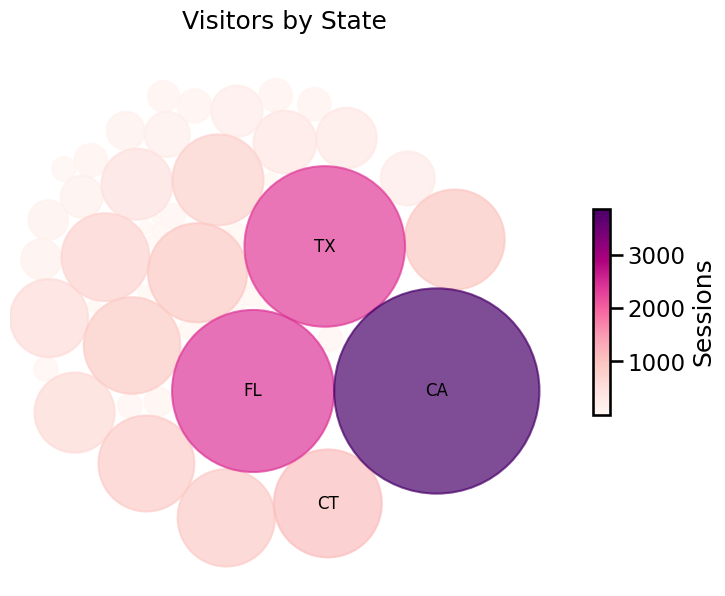

In [1142]:
# Group data by State and Sessions
df = grouped_data.sort_values('Sessions')  # the order is now ['B', 'A', 'E', 'C', 'F', 'D']

# Define a light to dark color scale based on Sessions
norm = Normalize(vmin=df['Sessions'].min(), vmax=df['Sessions'].max())
cmap = plt.cm.RdPu  # Change the colormap here
colors = cmap(norm(df['Sessions']))

# Get the top 4 states
top_states = df.nlargest(4, 'Sessions')

circles = circlify.circlify(df['Sessions'].tolist(),
                            show_enclosure=False,
                            target_enclosure=circlify.Circle(x=0, y=0, r=1))

fig, ax = plt.subplots(figsize=(7, 7))

ax.set_title('Visitors by State')
ax.axis('off')
ax.set_aspect('equal')  # show circles as circles, not as ellipses

lim = max(max(abs(circle.x) + circle.r, abs(circle.y) + circle.r) for circle in circles)
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)

labels = df['State']
for circle, label, color in zip(circles, labels, colors):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.7, color=color))
    if label in top_states['State'].tolist():
        ax.annotate(label, (x, y), va='center', ha='center', size=12)

# Create a colorbar to show the Sessions colorscale
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, shrink=0.3, aspect=12)
cbar.set_label('Sessions')

plt.show()

Here, we are able to identify our visitors. Most of the visitors belong to: 
1. California
3. Texas
4. Florida
5. Connecticut

Let us try to dig into the regional insights a bit more.

#### Visitors by Device Type 

In [1143]:
# Group data by sessions and device type
session_per_device = dataset.groupby('Device Type')['Sessions'].sum().reset_index()
session_per_device.head()

# Calculate the percentage of sessions for each device type

total_sessions = sum(session_per_device['Sessions']) # Calculate the total number of sessions which is 20256

session_per_device['percentage'] = [session / total_sessions * 100 for session in session_per_device['Sessions']]
print(session_per_device)

  Device Type  Sessions  percentage
0     Desktop     14271   70.453199
1      Mobile      4827   23.829976
2      Tablet      1158    5.716825


In [1144]:
# Create a new data frame in the required format for plotting

# Create the desired dictionary
result = {row['Device Type']: round(row['percentage'],2) for _, row in session_per_device.iterrows()}

print(result) 

df = pd.DataFrame(result, index=['Session']) # Store dictionary as a data frame using pandas

{'Desktop': 70.45, 'Mobile': 23.83, 'Tablet': 5.72}


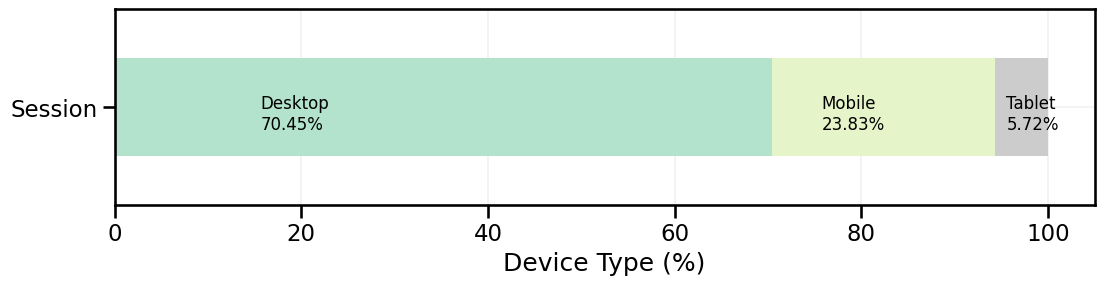

In [1145]:
# Plot horizontal stacked bar chart

df.plot(kind='barh',
         stacked=True,
         colormap='Pastel2',
         figsize=(10, 2),
         legend=False)

# Add the gridline
plt.grid(linewidth=0.2)

# Add labels
plt.xlabel("Device Type (%)")
for (value, y_loc, col) in zip(df.loc['Session'], df.loc['Session'].cumsum(), df.columns):
     plt.text(x=(y_loc - value) + (value / 4.5),
              y=0 - 0.11,
              s=f'{col}\n{value}%',
              color="black",
              fontsize=12)

 
plt.show()

Here, we learn that More than 70% of the users visit the website through a desktop followed by mobile. Tablet is the least used device by the visitors.

#### Visitors by Browser Name 

In [1181]:
# Group data by sessions and browser name
session_per_browser = dataset.groupby('Browser Name')['Sessions'].sum().reset_index()
session_per_browser.head()

,Browser Name,Sessions
0,AOL Browser,28
1,Amazon Silk,90
2,Chrome,7662
3,Chrome Mobile,1982
4,Chromium,3


In [1182]:
# Calculate the percentage of sessions for each browser

total_sessions = sum(session_per_browser['Sessions']) # Calculate the total number of sessions which is 20256

session_per_browser['percentage'] = [session / total_sessions * 100 for session in session_per_browser['Sessions']]
print(session_per_browser)

                Browser Name  Sessions  percentage
0                AOL Browser        28    0.138231
1                Amazon Silk        90    0.444313
2                     Chrome      7662   37.825829
3              Chrome Mobile      1982    9.784755
4                   Chromium         3    0.014810
5              Comodo Dragon         4    0.019747
6                       Edge      1507    7.439771
7                    Firefox      1607    7.933452
8          Internet Explorer      2121   10.470972
9   Internet Explorer Mobile         3    0.014810
10              MIUI Browser         1    0.004937
11                     Opera        27    0.133294
12              Opera Mobile         4    0.019747
13                     Other         1    0.004937
14                 Pale Moon         1    0.004937
15                    Puffin         2    0.009874
16                    Safari      4777   23.583136
17           Samsung Browser       398    1.964850
18                 SeaMonkey   

In [1183]:
# Create a new data frame in the required format for plotting

# Create the desired dictionary
browsername = {row['Browser Name']: round(row['percentage'],2) for _, row in session_per_browser.iterrows()}

print(browsername) 

{'AOL Browser': 0.14, 'Amazon Silk': 0.44, 'Chrome': 37.83, 'Chrome Mobile': 9.78, 'Chromium': 0.01, 'Comodo Dragon': 0.02, 'Edge': 7.44, 'Firefox': 7.93, 'Internet Explorer': 10.47, 'Internet Explorer Mobile': 0.01, 'MIUI Browser': 0.0, 'Opera': 0.13, 'Opera Mobile': 0.02, 'Other': 0.0, 'Pale Moon': 0.0, 'Puffin': 0.01, 'Safari': 23.58, 'Samsung Browser': 1.96, 'SeaMonkey': 0.01, 'Unknown': 0.17}


In [1184]:
# Store dictionary as a data frame using pandas
df = pd.DataFrame(browsername, index=['Session'])
df

,AOL Browser,Amazon Silk,Chrome,Chrome Mobile,Chromium,Comodo Dragon,Edge,Firefox,Internet Explorer,Internet Explorer Mobile,MIUI Browser,Opera,Opera Mobile,Other,Pale Moon,Puffin,Safari,Samsung Browser,SeaMonkey,Unknown
Session,0.14,0.44,37.83,9.78,0.01,0.02,7.44,7.93,10.47,0.01,0.0,0.13,0.02,0.0,0.0,0.01,23.58,1.96,0.01,0.17


In [1185]:
# Sort the data by the 'Session' column to identify the top 2 browsers
df = df.T.sort_values(by='Session', ascending=False).T
df

,Chrome,Safari,Internet Explorer,Chrome Mobile,Firefox,Edge,Samsung Browser,Amazon Silk,Unknown,AOL Browser,Opera,Opera Mobile,Comodo Dragon,Internet Explorer Mobile,Puffin,Chromium,SeaMonkey,Other,Pale Moon,MIUI Browser
Session,37.83,23.58,10.47,9.78,7.93,7.44,1.96,0.44,0.17,0.14,0.13,0.02,0.02,0.01,0.01,0.01,0.01,0.0,0.0,0.0


37.83 37.83
61.41 23.58


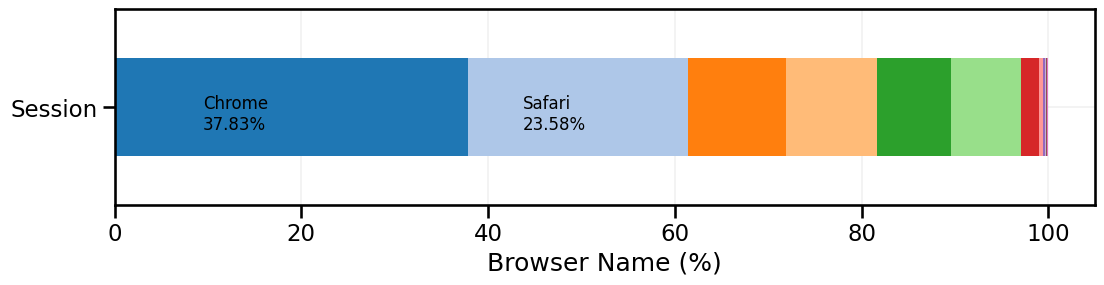

In [1189]:
# Plot horizontal stacked bar chart
ax = df.plot(kind='barh', colormap = 'tab20', stacked=True, figsize=(10, 2), legend=False)

# Add the gridline
plt.grid(linewidth=0.2)

# Add labels
plt.xlabel("Browser Name (%)")
for idx, (value, y_loc, col) in enumerate(zip(df.loc['Session'], df.loc['Session'].cumsum(), df.columns)):
     if (idx < 2):
         print(y_loc, value)
         plt.text(x=(y_loc- value) + (value / 4),
                  y=0 - 0.11,
                  s=f'{col}\n{value}%',
                  color="black",
                  fontsize=12)
     else:
         break

The visitors use Chrome the most followed by Safari.

#### Visitors by OS 

In [1190]:
# Group data by sessions and OS
session_per_OS = dataset.groupby('OS Name')['Sessions'].sum().reset_index()
session_per_OS.head()

,OS Name,Sessions
0,Android,2348
1,Chrome OS,162
2,Linux,141
3,Linux - Fedora,2
4,Linux - Ubuntu,25


In [1191]:
# Calculate the percentage of sessions for each OS

total_sessions = sum(session_per_OS['Sessions']) # Calculate the total number of sessions which is 20256

session_per_OS['percentage'] = [session / total_sessions * 100 for session in session_per_OS['Sessions']]
print(session_per_OS)

             OS Name  Sessions  percentage
0            Android      2348   11.591627
1          Chrome OS       162    0.799763
2              Linux       141    0.696090
3     Linux - Fedora         2    0.009874
4     Linux - Ubuntu        25    0.123420
5               OS X      2235   11.033768
6   PlayStation 4 OS         1    0.004937
7            Unknown        26    0.128357
8            Windows         5    0.024684
9         Windows 10      6668   32.918641
10         Windows 7      4095   20.216232
11         Windows 8        44    0.217220
12       Windows 8.1       675    3.332346
13     Windows Phone         4    0.019747
14        Windows RT         9    0.044431
15     Windows Vista        95    0.468997
16        Windows XP        97    0.478870
17               iOS      3624   17.890995


In [1192]:
# Create a new data frame in the required format for plotting

# Create the desired dictionary
osname = {row['OS Name']: round(row['percentage'],2) for _, row in session_per_OS.iterrows()}

print(osname) 

{'Android': 11.59, 'Chrome OS': 0.8, 'Linux': 0.7, 'Linux - Fedora': 0.01, 'Linux - Ubuntu': 0.12, 'OS X': 11.03, 'PlayStation 4 OS': 0.0, 'Unknown': 0.13, 'Windows': 0.02, 'Windows 10': 32.92, 'Windows 7': 20.22, 'Windows 8': 0.22, 'Windows 8.1': 3.33, 'Windows Phone': 0.02, 'Windows RT': 0.04, 'Windows Vista': 0.47, 'Windows XP': 0.48, 'iOS': 17.89}


In [1193]:
# Store dictionary as a data frame using pandas
df_osname = pd.DataFrame(osname, index=['Session'])
df_osname

,Android,Chrome OS,Linux,Linux - Fedora,Linux - Ubuntu,OS X,PlayStation 4 OS,Unknown,Windows,Windows 10,Windows 7,Windows 8,Windows 8.1,Windows Phone,Windows RT,Windows Vista,Windows XP,iOS
Session,11.59,0.8,0.7,0.01,0.12,11.03,0.0,0.13,0.02,32.92,20.22,0.22,3.33,0.02,0.04,0.47,0.48,17.89


In [1194]:
# Sort the data by the 'Session' column to identify the top 2 browsers
df_os = df_osname.T.sort_values(by='Session', ascending=False).T
df_os

,Windows 10,Windows 7,iOS,Android,OS X,Windows 8.1,Chrome OS,Linux,Windows XP,Windows Vista,Windows 8,Unknown,Linux - Ubuntu,Windows RT,Windows,Windows Phone,Linux - Fedora,PlayStation 4 OS
Session,32.92,20.22,17.89,11.59,11.03,3.33,0.8,0.7,0.48,0.47,0.22,0.13,0.12,0.04,0.02,0.02,0.01,0.0


32.92 32.92
53.14 20.22
71.03 17.89
82.62 11.59


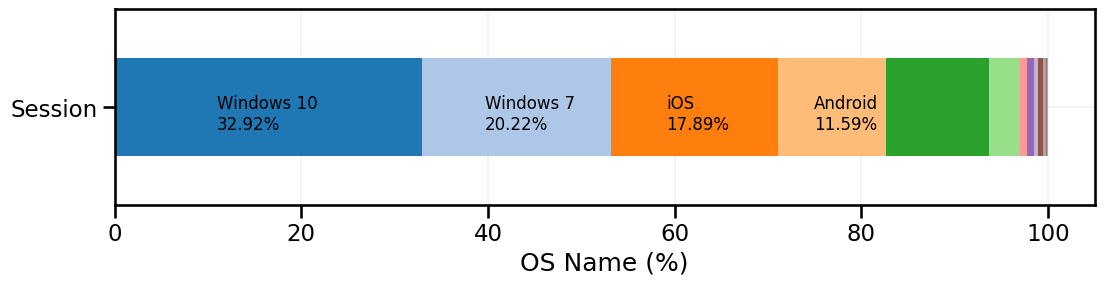

In [1195]:
# Plot horizontal stacked bar chart
ax = df_os.plot(kind='barh', colormap = 'tab20', stacked=True, figsize=(10, 2), legend=False)

# Add the gridline
plt.grid(linewidth=0.2)

# Add labels
plt.xlabel("OS Name (%)")
for idx, (value, y_loc, col) in enumerate(zip(df_os.loc['Session'], df_os.loc['Session'].cumsum(), df_os.columns)):
     if (idx < 4):
         print(y_loc, value)
         plt.text(x=(y_loc- value) + (value / 3),
                  y=0 - 0.11,
                  s=f'{col}\n{value}%',
                  color="black",
                  fontsize=12)
     else:
         break

Ergo, we learn that most visitors who also are potential customers use desktops on Windows 10 and access through Google Chrome and Safari browsers. It is safe to infer, that:

- The website should be optimized for compatibility with the Windows 10 operating system. It should help to ensure that it functions well in the Windows 10 environment and that any software or features on the site work seamlessly with Windows.
- Since visitors primarily use Google Chrome and Safari, it's important to prioritize the compatibility and performance of the website on these two browsers. Conducting browser testing can help to ensure the site works correctly on both Chrome and Safari, as they have their unique rendering engines and features.
- Knowing the most popular operating systems and browsers used by the visitors allows us to tailor the user experience to these preferences. We can optimize the design and features of the website to work well on both Chrome and Safari, enhancing the user experience for the majority of your visitors.
- We can allocate development and testing resources more efficiently by focusing on Windows 10 and the specific browsers the visitors use. This can help streamline development efforts and prioritize updates for the most critical platforms.

### Total orders by State

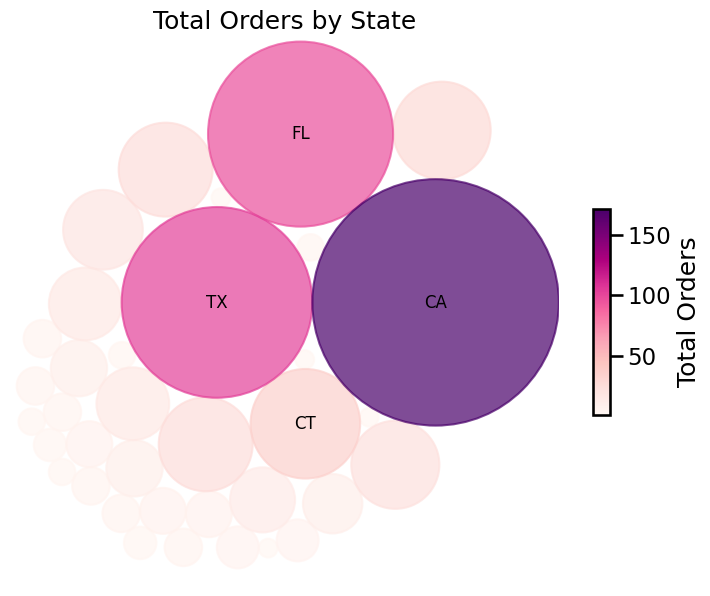

In [1158]:
# Group data by State and total orders
grouped_datato = dataset.groupby('State')['Total Orders'].sum().reset_index()
data = grouped_datato[(grouped_datato != 0).all(1)]
df = data.sort_values('Total Orders')  

# Define a light to dark color scale based on Sessions
norm = Normalize(vmin=df['Total Orders'].min(), vmax=df['Total Orders'].max())
cmap = plt.cm.RdPu  # Change the colormap here
colors = cmap(norm(df['Total Orders']))

# Get the top 4 states
top_states = df.nlargest(4, 'Total Orders')

circles = circlify.circlify(df['Total Orders'].tolist(),
                            show_enclosure=False,
                            target_enclosure=circlify.Circle(x=0, y=0, r=1))

# Set up the plot 
fig, ax = plt.subplots(figsize=(7, 7))

ax.set_title('Total Orders by State')
ax.axis('off')
ax.set_aspect('equal')  # show circles as circles, not as ellipses

lim = max(max(abs(circle.x) + circle.r, abs(circle.y) + circle.r) for circle in circles)
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)

# Plot and add labels
labels = df['State']
for circle, label, color in zip(circles, labels, colors):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.7, color=color))
    if label in top_states['State'].tolist():
        ax.annotate(label, (x, y), va='center', ha='center', size=12)

# Create a colorbar to show the Total Orders colorscale
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, shrink=0.3, aspect=12)
cbar.set_label('Total Orders')

plt.show()

The most orders are placed from:
1. California
2. Texas
3. Florida
4. Connecticut

### Total Orders by Device Type

In [1196]:
# Grouping and sorting data by Device Type and Total Orders
order_per_device = dataset.groupby('Device Type')['Total Orders'].sum().reset_index()
order_per_device

,Device Type,Total Orders
0,Desktop,288.0
1,Mobile,328.0
2,Tablet,47.0


In [1160]:
# Calculate the percentage of orders for each device type

total_orders = sum(order_per_device['Total Orders']) # Calculate the total number of orders which is 663
total_orders

order_per_device['percentage'] = [order / total_orders * 100 for order in order_per_device['Total Orders']]
print(order_per_device)

  Device Type  Total Orders  percentage
0     Desktop         288.0   43.438914
1      Mobile         328.0   49.472097
2      Tablet          47.0    7.088989


In [1161]:
# Create a new data frame in the required format for plotting

# Create the desired dictionary
result_order_device = {row['Device Type']: round(row['percentage'],2) for _, row in order_per_device.iterrows()}

print(result_order_device) 

df_result_order_device = pd.DataFrame(result_order_device, index=['Total Orders']) # Store dictionary as a data frame using pandas

{'Desktop': 43.44, 'Mobile': 49.47, 'Tablet': 7.09}


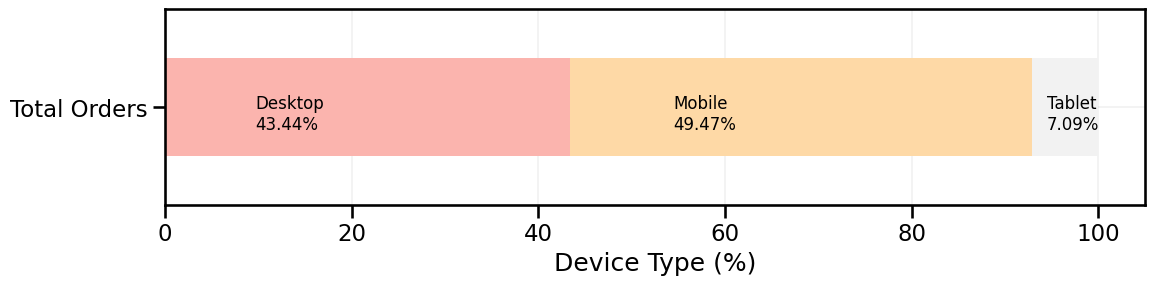

In [1162]:
# Plot horizontal stacked bar chart

df_result_order_device.plot(kind='barh',
         stacked=True,
         colormap='Pastel1',
         figsize=(10, 2),
         legend=False)

# Add labels
plt.xlabel("Device Type (%)")
for (value, y_loc, col) in zip(df_result_order_device.loc['Total Orders'], df_result_order_device.loc['Total Orders'].cumsum(), df_result_order_device.columns):
     plt.text(x=(y_loc - value) + (value / 4.5),
              y=0 - 0.11,
              s=f'{col}\n{value}%',
              color="black",
              fontsize=12)

# Add the gridline
plt.grid(linewidth=0.2)

plt.show()

The higher number of visitors from the desktop does not resonate with the orders placed. The highest number of orders are placed through mobile device type. Even though 70% of the visitors use desktops, the total number of orders is higher through mobile device type at approximately 50%. This tells us that the marketing strategy in place is not converting the visitors from the desktop as much. This insight is actionable as it is a potential opportunity to target those desktop visitors by optimizing the cart purchase experience.

Let's breakdown the total orders further to understand this a bit more deeply. 

### Order breakdown by device type

In [1163]:
# Group data by total orders and device type
cart_order_devicetype = dataset.groupby('Device Type')['Cart Order'].sum().reset_index()
cart_order_devicetype.set_index('Device Type', inplace=True)
cart_order_devicetype

,Cart Order
Device Type,
Desktop,144.0
Mobile,137.0
Tablet,24.0


In [1164]:
phone_order_devicetype = dataset.groupby('Device Type')['Phone Order'].sum().reset_index()
phone_order_devicetype.set_index('Device Type', inplace=True)
phone_order_devicetype

,Phone Order
Device Type,
Desktop,144.0
Mobile,191.0
Tablet,23.0


In [1165]:
# Concat the phone orders and cart orders vertically
result = pd.concat([cart_order_devicetype, phone_order_devicetype], axis=1)
result

,Cart Order,Phone Order
Device Type,,
Desktop,144.0,144.0
Mobile,137.0,191.0
Tablet,24.0,23.0


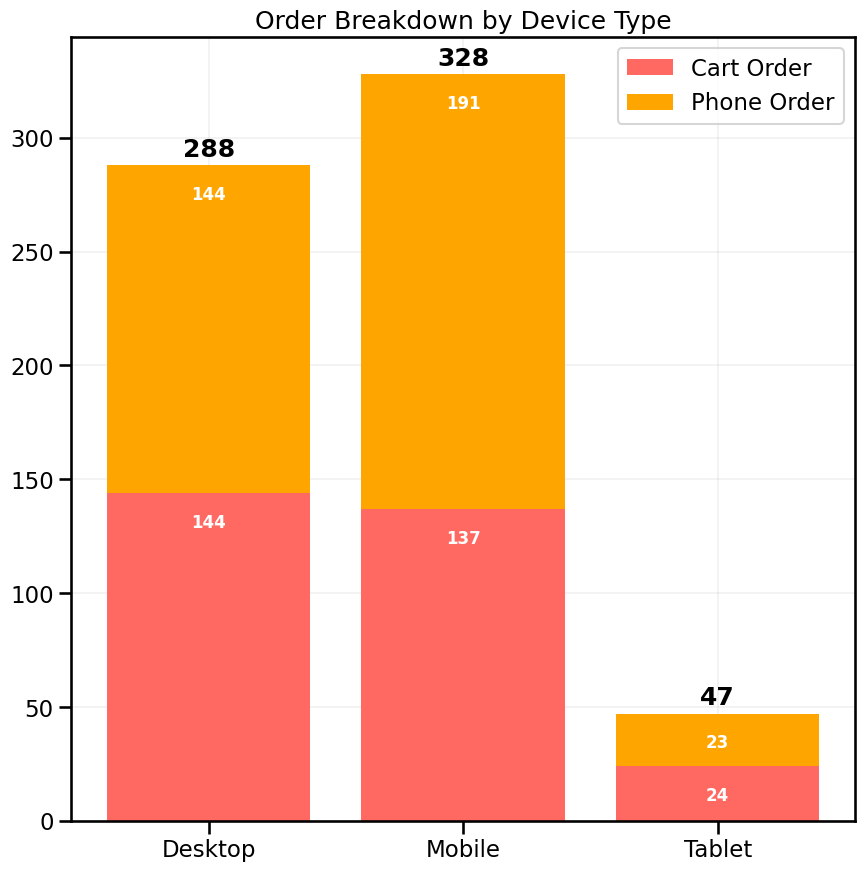

In [1166]:
fig, ax = plt.subplots(figsize=(8, 8))

colors = ['#FF6961', '#FFA500']
bottom = np.zeros(len(result))

for i, col in enumerate(result.columns):
  ax.bar(
      result.index, result[col], bottom=bottom, label=col, color=colors[i])
  bottom += np.array(result[col])

totals = result.sum(axis=1)
y_offset = 4
for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset, round(total), ha='center',
          weight='bold')

# Let's put the annotations inside the bars themselves by using a
# negative offset.
y_offset = -15

# For each patch (basically each rectangle within the bar), add a label.
for bar in ax.patches:
  ax.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      round(bar.get_height()),
      # Center the labels and style them a bit.
      ha='center',
      color='w',
      weight='bold',
      size=12,
  )

# Add the gridline
plt.grid(linewidth=0.2)

ax.set_title('Order Breakdown by Device Type')
ax.legend()

Further confirming our analysis, we learn that cart orders that are placed from the website are low and beg our attention. From mobile, people prefer phone calling in to place their orders.

This insight that a higher number of visitors come from desktop, yet a higher percentage of orders are placed through mobile devices and phone calls to sales agents suggests several important implications:

- There is a significant conversion rate discrepancy between desktop and mobile users. While desktop users make up a substantial portion of the website traffic, they are not converting at the same rate as mobile users. This indicates a potential issue with the website's desktop user experience or marketing strategy.
- The website seems to be performing well in terms of converting mobile users, indicating that the mobile experience and the sales funnel may be effectively designed and optimized for mobile users. This highlights a positive aspect of the strategy.
- The fact that a significant number of orders are placed through phone calls to sales agents suggests that some customers prefer direct human interaction or may have questions or concerns that they want to address with a sales representative. This highlights the importance of having robust phone support and a responsive sales team and also adding relevant content on the website that can answer the questions or address the concerns of the users.
- The insight suggests **actionable opportunities**:
    - Improve the desktop user experience, especially regarding the cart purchase process. This could involve streamlining the checkout process, addressing any potential usability issues, and ensuring that the desktop version of the website is user-friendly and encourages conversions.
    - Also it indicates that the current marketing strategy, which attracts a higher number of desktop visitors, might not be as effective in converting those visitors into customers. **We need to revisit your marketing tactics and consider strategies that specifically target desktop users or incentivize them to complete purchases.**
    - It's important to delve deeper into user behavior and conduct A/B testing or user surveys to identify the specific pain points or barriers that desktop visitors encounter in the conversion process. This can help make data-driven improvements to the website.

### Cart orders by Device Type and Traffic Source

Low cart orders beg our attention, so we dig deeper into “Cart orders by Device Type and Traffic Source.” 

In [1167]:
# Reshaping data for plotting

# Group Cart Order data by traffic source and device type
cart_order_traffic_source = dataset.groupby(['Device Type', 'Traffic Source'])['Cart Order'].sum().reset_index()
cart_order_traffic_source.set_index(['Device Type', 'Traffic Source'], inplace=True)
cart_order_traffic_source

# Group Sessions data by traffic source and device type
session_traffic_source = dataset.groupby(['Device Type', 'Traffic Source'])['Sessions'].sum().reset_index()
session_traffic_source.set_index(['Device Type', 'Traffic Source'], inplace=True)
session_traffic_source

# Concat the two datasets
result_traffic_source = pd.concat([cart_order_traffic_source, session_traffic_source], axis=1)
result_traffic_source

Cart Order  Sessions
Device Type Traffic Source                      
Desktop     direct entry          51.0      9394
            natural search        55.0      1530
            other                  0.0        97
            paid search           38.0      3250
Mobile      direct entry          51.0      2275
            natural search        43.0       943
            other                  2.0        28
            paid search           41.0      1581
Tablet      direct entry          11.0       582
            natural search         5.0       139
            other                  0.0         4
            paid search            8.0       433

In [1168]:
# Calculate the Conversion Rate
result_traffic_source['Cart Conversion Rate'] = result_traffic_source['Cart Order'] / result_traffic_source['Sessions'] * 100
result_traffic_source

Cart Order  Sessions  Cart Conversion Rate
Device Type Traffic Source                                            
Desktop     direct entry          51.0      9394              0.542900
            natural search        55.0      1530              3.594771
            other                  0.0        97              0.000000
            paid search           38.0      3250              1.169231
Mobile      direct entry          51.0      2275              2.241758
            natural search        43.0       943              4.559915
            other                  2.0        28              7.142857
            paid search           41.0      1581              2.593295
Tablet      direct entry          11.0       582              1.890034
            natural search         5.0       139              3.597122
            other                  0.0         4              0.000000
            paid search            8.0       433              1.847575

Text(0, 0.5, 'Cart Conversion Rate (%)')

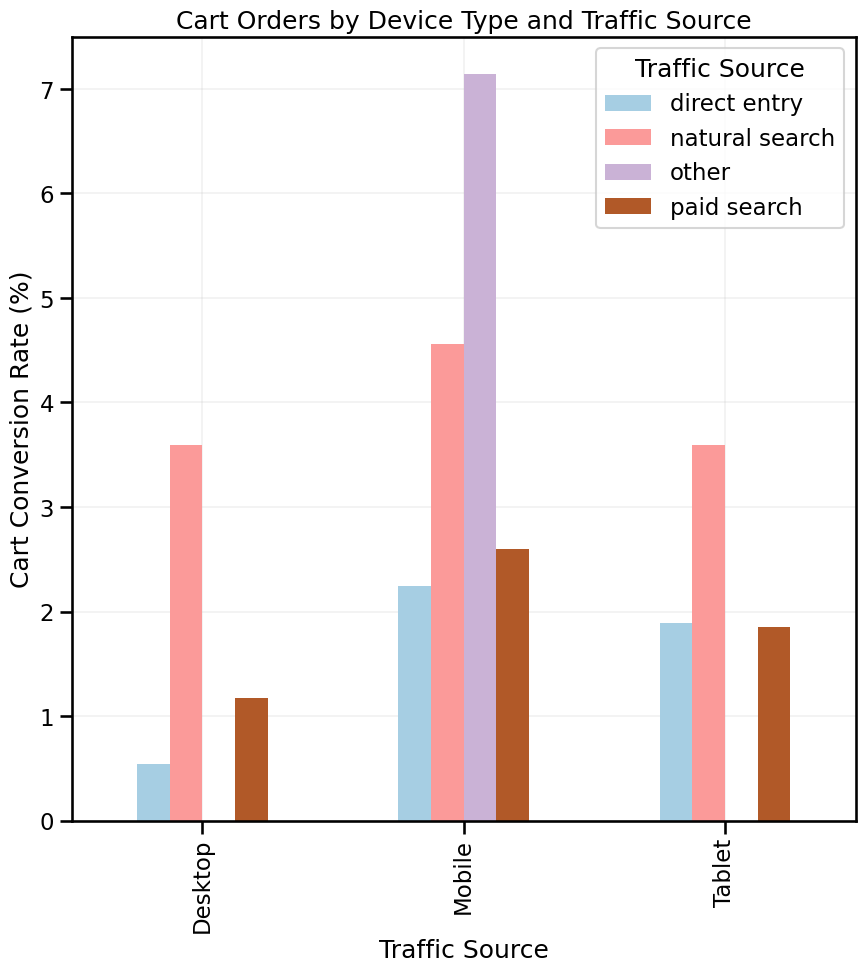

In [1169]:
plot = result_traffic_source.unstack().plot(kind='bar',y='Cart Conversion Rate',figsize=(8, 8), colormap='Paired')

# Add the gridline
plt.grid(linewidth=0.2)

# Add labels and annotations
plt.title('Cart Orders by Device Type and Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Cart Conversion Rate (%)')

- To address the low cart conversion rate, it is crucial to enhance the user experience, particularly for those entering the website directly on a desktop device. This should involve improving the design, usability, and functionality of the cart and checkout process for this specific user segment.
- Optimizing the cart purchase experience for direct entry traffic segments should help boost the numbers as proportionally the rate of cart conversions is relatively low.
- Precisely, the cart purchase experience of direct entry segments on the desktop device should be paid the most attention as it is below 1%.

### Conversion Rate by Hour of the Day

In [1170]:
dataset['Session Start Time']

0       2018-02-28 13:49:47
1       2018-02-28 13:49:47
2       2018-02-26 14:12:28
3       2018-02-18 18:47:47
4       2018-02-25 17:50:04
                ...        
20251   2018-02-18 10:40:51
20252   2018-03-02 16:45:24
20253   2018-02-25 00:30:07
20254   2018-02-21 20:19:47
20255   2018-02-21 13:26:01
Name: Session Start Time, Length: 20256, dtype: datetime64[ns]

In [1171]:
from datetime import datetime, timedelta

def hour_rounder(t):
    # Rounds to nearest hour by adding a timedelta hour if minute >= 30
    return (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)
               +timedelta(hours=t.minute//30))

In [1172]:
dataset['time']=dataset['Session Start Time'].apply(hour_rounder).dt.hour
dataset

,Session Id,Session Start Time,Browser Name,Sessions,Total Orders,Cart Order,Phone Order,City,Connection Speed,Country,...,ISP Name,Landing Page Raw,Manufacturer,Metro Name,OS Name,Order Monthly Charge,State,Zip Code,Traffic Source,time
0,03b1d69a-6463-40a3-b67b-a434d02d673b,2018-02-28 13:49:47,Chrome,1,1.0,NaN,1.0,Glendale,Broadband,US,...,Verizon Business,https://phonecompanyx.com/,Unknown,Phoenix (Prescott),Windows 10,59.99,AZ,85301,natural search,14
1,03b1d69a-6463-40a3-b67b-a434d02d673b,2018-02-28 13:49:47,Chrome,1,1.0,NaN,1.0,Glendale,Broadband,US,...,Verizon Business,https://phonecompanyx.com/,Unknown,Phoenix (Prescott),Windows 10,59.99,AZ,85301,natural search,14
2,067b30cf-b070-4e26-bf5e-9c8fc52ab3d5,2018-02-26 14:12:28,Safari,1,1.0,NaN,1.0,Riverside,Xdsl,US,...,Att Internet Services,https://phonecompanyx.com/,Apple,Los Angeles,OS X,79.99,CA,92507,direct entry,14
3,178df541-6cdd-4dc4-af9e-f85b8ae5b334,2018-02-18 18:47:47,Chrome,1,1.0,NaN,1.0,San Antonio,Cable,US,...,Time Warner Cable Internet Llc,https://phonecompanyx.com/,Unknown,San Antonio,Windows 7,24.99,TX,78203,direct entry,19
4,20b785f2-920a-4222-b517-407ece1a6439,2018-02-25 17:50:04,Firefox,1,1.0,NaN,1.0,Beverly Hills,Broadband,US,...,Mci Communications Services Inc. Dba Verizon B...,https://phonecompanyx.com/,Unknown,Los Angeles,Windows 7,24.99,CA,90212,direct entry,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20251,00729246-5992-4d66-84ad-2649f6f7b880,2018-02-18 10:40:51,Safari,1,NaN,NaN,NaN,Myrtle Beach,Cable,US,...,Time Warner Cable Internet Llc,https://phonecompanyx.com/order-online?mcid=35...,Apple,Myrtle Beach-Florence,iOS,NaN,SC,29577,paid search,11
20252,00c57b80-7e57-4385-b49e-a02de885d5ad,2018-03-02 16:45:24,Chrome Mobile,1,NaN,NaN,NaN,Elkhart,Xdsl,US,...,Frontier Communications Of America Inc.,https://phonecompanyx.com/,Samsung,South Bend-Elkhart,Android,NaN,IN,46516,paid search,17
20253,02b52a54-e792-4cd6-b527-55b2ae7abf47,2018-02-25 00:30:07,Amazon Silk,1,NaN,NaN,NaN,Bartow,Xdsl,US,...,Frontier Communications Of America Inc.,https://phonecompanyx.com/shop/internet/fios-ctf,Amazon,Tampa-St. Pete (Sarasota),Android,NaN,FL,33830,paid search,1
20254,01d6575c-3116-4cfa-b9ef-4d724d457a39,2018-02-21 20:19:47,Safari,1,NaN,NaN,NaN,Southlake,Broadband,US,...,Frontier Communications Of America Inc.,https://phonecompanyx.com/?utm_medium=other&ut...,Apple,Dallas-Ft. Worth,iOS,NaN,TX,76092,other,20


In [1173]:
# Calculate sum of Cart Order, Phone Order and Total Orders grouped by time

cart_order_time = dataset.groupby(['time']).agg({'Cart Order':'sum','Phone Order':'sum','Sessions':'sum'}).reset_index()
#cart_order_time.set_index(['time'], inplace=True)
cart_order_time

,time,Cart Order,Phone Order,Sessions
0,0,4.0,3.0,428
1,1,5.0,0.0,297
2,2,3.0,0.0,201
3,3,3.0,0.0,179
4,4,1.0,0.0,169
5,5,1.0,0.0,250
6,6,2.0,3.0,406
7,7,9.0,10.0,641
8,8,6.0,21.0,940
9,9,15.0,19.0,1101


In [1174]:
# Calculate the Cart Conversion Rate
cart_order_time['cart_conversion_rate'] = cart_order_time['Cart Order'] / cart_order_time['Sessions'] * 100

# Calculate the Phone Conversion Rate
cart_order_time['phone_conversion_rate'] = cart_order_time['Phone Order'] / cart_order_time['Sessions'] * 100
cart_order_time

,time,Cart Order,Phone Order,Sessions,cart_conversion_rate,phone_conversion_rate
0,0,4.0,3.0,428,0.934579,0.700935
1,1,5.0,0.0,297,1.683502,0.000000
2,2,3.0,0.0,201,1.492537,0.000000
3,3,3.0,0.0,179,1.675978,0.000000
4,4,1.0,0.0,169,0.591716,0.000000
5,5,1.0,0.0,250,0.400000,0.000000
6,6,2.0,3.0,406,0.492611,0.738916
7,7,9.0,10.0,641,1.404056,1.560062
8,8,6.0,21.0,940,0.638298,2.234043
9,9,15.0,19.0,1101,1.362398,1.725704


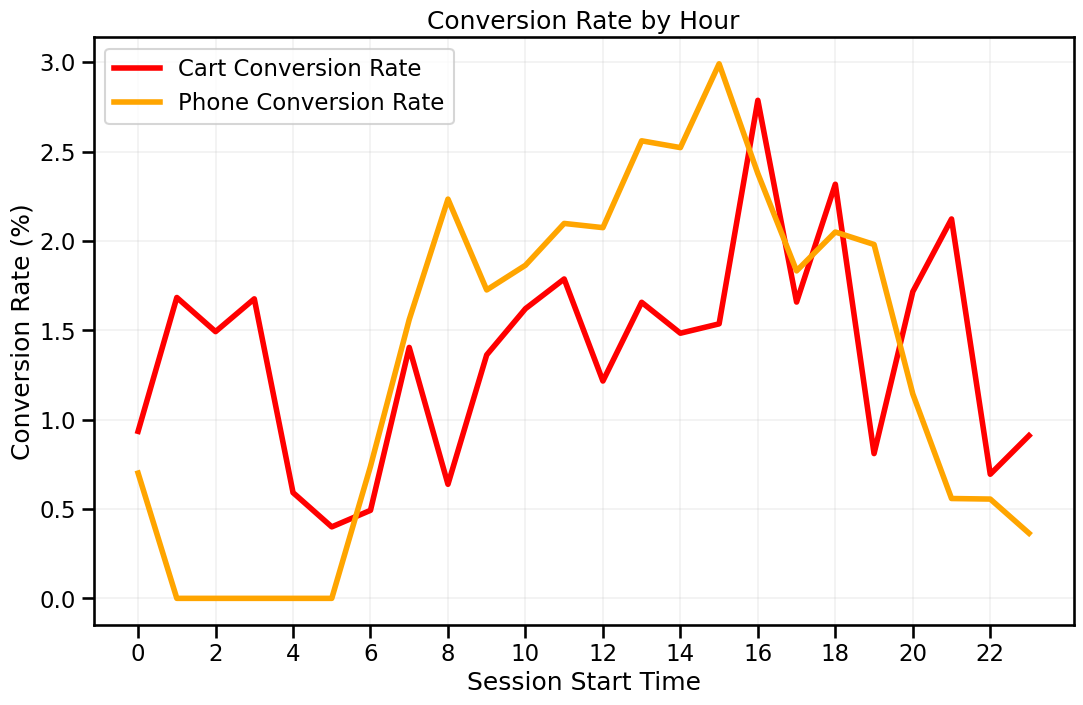

In [1175]:
plt.figure(figsize=(10,6))
plt.plot(cart_order_time['time'], cart_order_time['cart_conversion_rate'], label='Cart Conversion Rate', color='red', linewidth=4)
plt.plot(cart_order_time['time'], cart_order_time['phone_conversion_rate'], label='Phone Conversion Rate', color='orange', linewidth=4)

# Adjust the x-axis intervals
plt.xticks(np.arange(0, 24, 2))

# Add the gridline
plt.grid(linewidth=0.2)

# Add label, legend and title
plt.title('Conversion Rate by Hour')
plt.xlabel('Session Start Time')
plt.ylabel('Conversion Rate (%)')
plt.legend()

plt.show()


- We learn that the peak time of cart conversions is at the 16th hour which is around 4:00 pm.
- The 15th hour for the phone conversions which is around 3:00 p.m.
- Unlike the cart conversions, the phone conversions are low after the 19th hour which is around 7:00 pm suggesting that perhaps, it is after hours for the phone call agents. 

### Total Order Monthly Charge by Traffic Source

In [1197]:
# Reshaping data for plotting

# Grouped  Monthly Charge and Traffic Source by Total Orders
total_order_monthly_charge = dataset.groupby(['Traffic Source'])['Order Monthly Charge'].sum().reset_index()
total_order_monthly_charge.set_index('Traffic Source', inplace=True)
total_order_monthly_charge = total_order_monthly_charge.sort_values(by='Order Monthly Charge', ascending=False)
total_order_monthly_charge

,Order Monthly Charge
Traffic Source,
direct entry,13152.85
natural search,10250.49
paid search,6538.25
other,129.97


Text(0, 0.5, 'Order Monthly Charge')

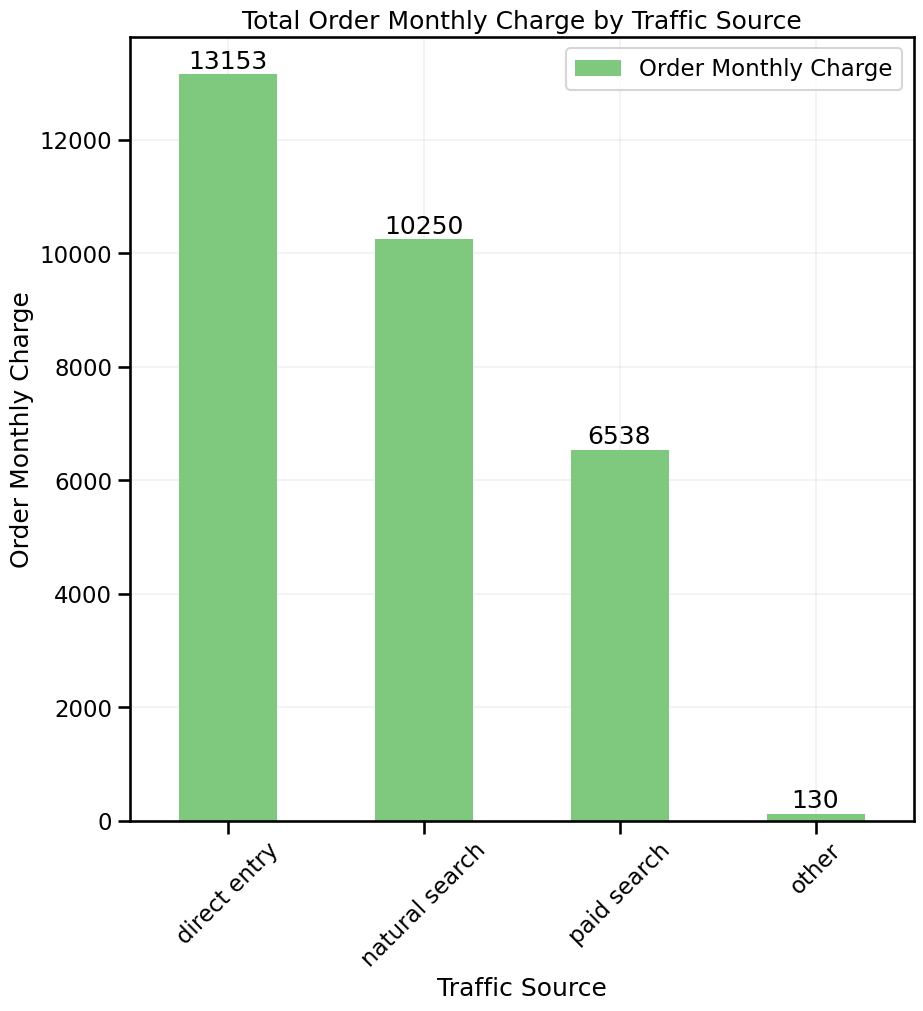

In [1198]:
total_order_monthly_charge.plot(kind='bar', figsize=(8, 8), colormap='Accent')

# Add the gridline
plt.grid(linewidth=0.2)

# Rotate the x-axis labels
plt.xticks(rotation=45)

for i, total in enumerate(total_order_monthly_charge['Order Monthly Charge']):
  plt.text(i, total + 100, round(total), ha='center')

# Add labels and annotations
plt.title('Total Order Monthly Charge by Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Order Monthly Charge')

- We learn that the telecom company monetizes the most from customers sourced off direct entry traffic as shown in Total Order Monthly Charge by Traffic Source.
- This is all the more reason why Creative Pulse's marketing team should focus more on optimizing the cart purchase experience for the direct traffic segment, precisely, on coming in through the desktop device as traffic is high but the conversion rate is low to improve profitability. 